<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Technical-Analysis/Candlestick_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Creating a candlestick chart

# Install Yahoo Finance and MPL Finance
!pip install --upgrade mpl_finance
!pip install --upgrade yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=35a29eda42f87a07aac84306605b8f157c732c071dedb1ed3ec81a118d29546b
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
# Import libraries
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

from mpl_finance import candlestick_ohlc

In [0]:
# Set the start date and end date
date1 = "2020-2-1"
date2 = "2020-4-12"

In [0]:
# Format dates
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()                  # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12


In [5]:
# Retrieve Apple stock quotes 
 quotes = yf.download('AAPL', progress=False)

# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]

# Print data
quotes

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,304.299988,313.489990,302.220001,308.660004,307.097900,43496400
2020-02-04,315.309998,319.640015,313.630005,318.850006,317.236298,34154100
2020-02-05,323.519989,324.760010,318.950012,321.450012,319.823181,29706700
2020-02-06,322.570007,325.220001,320.260010,325.209991,323.564117,26356400
2020-02-07,322.369995,323.399994,318.000000,320.029999,319.166016,29421000
2020-02-10,314.179993,321.549988,313.850006,321.549988,320.681915,27337200
2020-02-11,323.600006,323.899994,318.709991,319.609985,318.747131,23580800
2020-02-12,321.470001,327.220001,321.470001,327.200012,326.316681,28432600
2020-02-13,324.190002,326.220001,323.350006,324.869995,323.992950,23686900


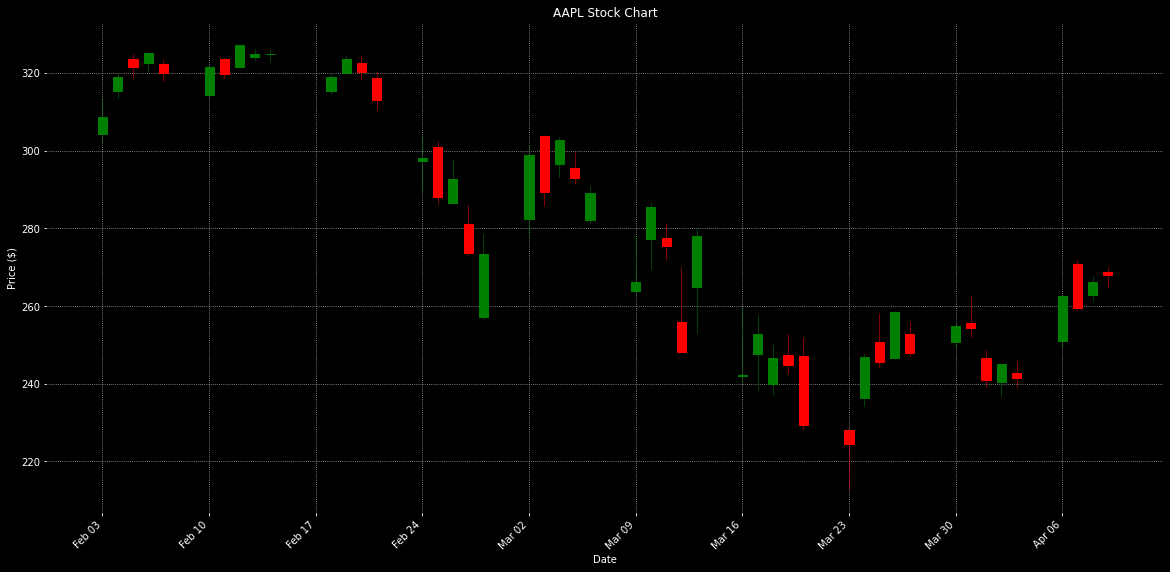

In [22]:
# Create candlestick plot
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Format candles
candlestick_ohlc(ax, zip(mdates.date2num(quotes.index.to_pydatetime()),
                         quotes['Open'], quotes['High'],
                         quotes['Low'], quotes['Close']),
                         width=0.6, colorup='g')

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax.set_facecolor('black')
ax.set_axisbelow(True)
ax.grid(linestyle=':')
ax.set_title('AAPL Stock Chart', color='white')
ax.figure.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis_date()
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Price ($)', color='white')

plt.show()